In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-restaurants-data/zomato.csv
/kaggle/input/zomato-restaurants-data/file5.json
/kaggle/input/zomato-restaurants-data/file1.json
/kaggle/input/zomato-restaurants-data/file2.json
/kaggle/input/zomato-restaurants-data/file4.json
/kaggle/input/zomato-restaurants-data/file3.json
/kaggle/input/zomato-restaurants-data/Country-Code.xlsx


In [2]:
data=pd.read_csv('/kaggle/input/zomato-restaurants-data/zomato.csv',encoding='ISO-8859-1')
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
data.shape

(9551, 21)

In [4]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [5]:
#Filter for Indian restaurants only
df_india = data[data['Country Code'] == 1]

In [6]:
#Drop rows with 0 rating or missing city/cuisine
df_india = df_india[df_india['Aggregate rating'] > 0]
df_india = df_india.dropna(subset=['City', 'Cuisines'])

In [7]:
#Clean categorical fields
df_india['Has Online delivery'] = df_india['Has Online delivery'].map({'Yes': 1, 'No': 0})
df_india['Is delivering now'] = df_india['Is delivering now'].map({'Yes': 1, 'No': 0})

In [8]:
# Saving Cleaned File
df_india.to_csv("zomato_cleaned_india.csv", index=False)


# Exploratory Data Analysis

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


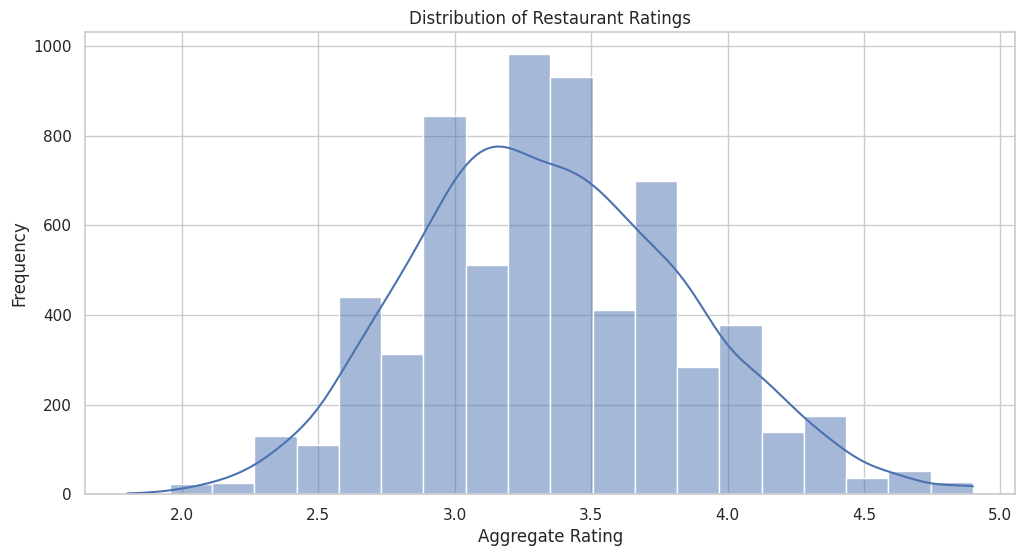

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Distribution of Ratings
sns.histplot(df_india['Aggregate rating'], bins=20, kde=True)
plt.title("Distribution of Restaurant Ratings")
plt.xlabel("Aggregate Rating")
plt.ylabel("Frequency")
plt.show()

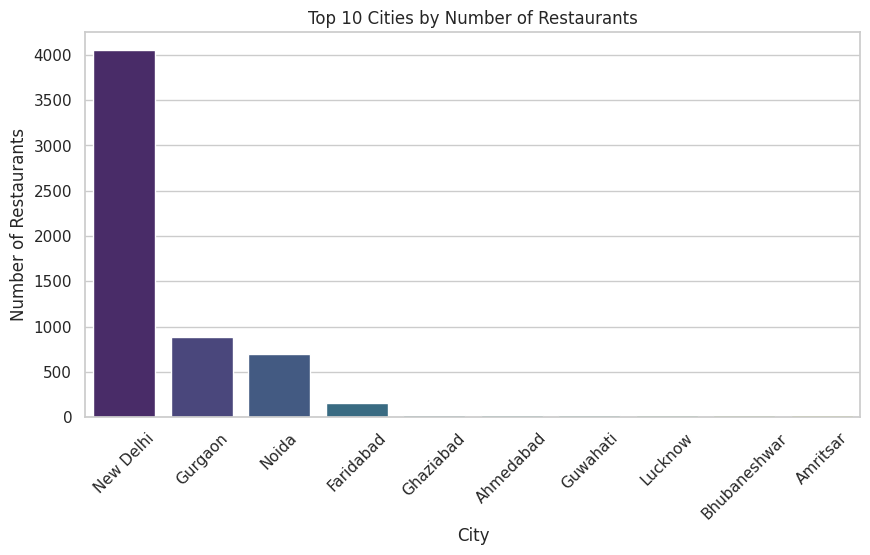

In [10]:
#Top 10 Cities by Restaurant Count
top_cities = df_india['City'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_cities.index, y=top_cities.values, palette="viridis")
plt.title("Top 10 Cities by Number of Restaurants")
plt.xlabel("City")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45)
plt.show()

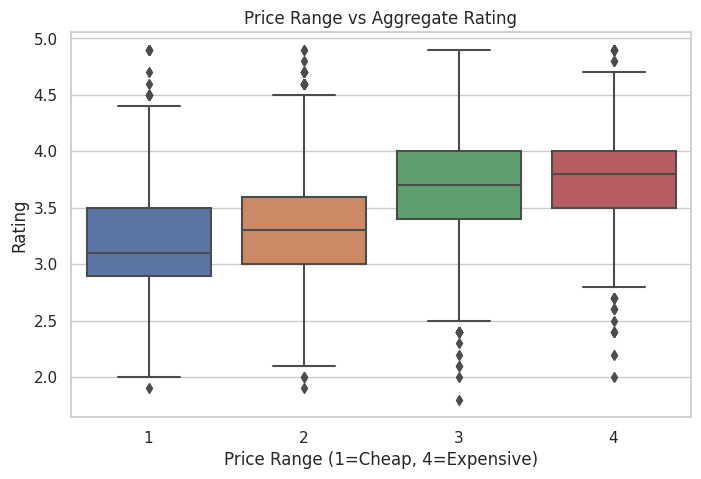

In [11]:
#  Price Range vs Rating
plt.figure(figsize=(8, 5))
sns.boxplot(x='Price range', y='Aggregate rating', data=df_india)
plt.title("Price Range vs Aggregate Rating")
plt.xlabel("Price Range (1=Cheap, 4=Expensive)")
plt.ylabel("Rating")
plt.show()

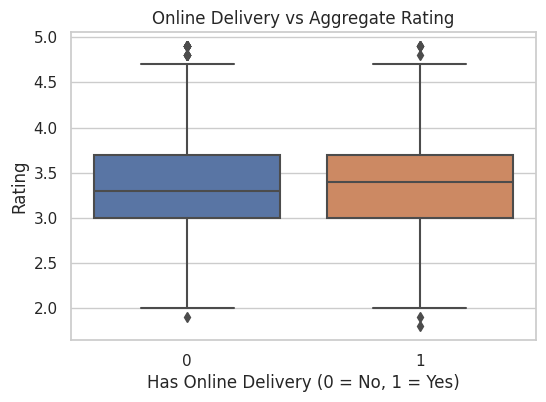

In [12]:
#  Online Delivery vs Rating
plt.figure(figsize=(6, 4))
sns.boxplot(x='Has Online delivery', y='Aggregate rating', data=df_india)
plt.title("Online Delivery vs Aggregate Rating")
plt.xlabel("Has Online Delivery (0 = No, 1 = Yes)")
plt.ylabel("Rating")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


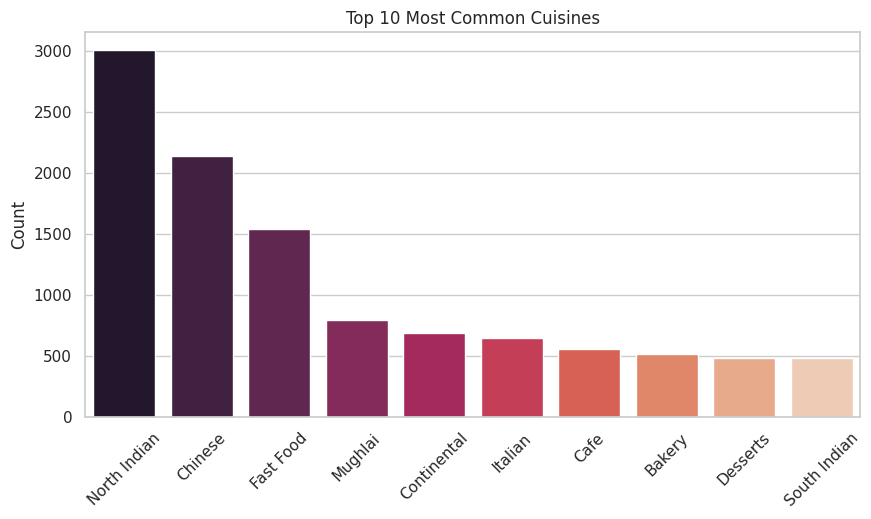

In [13]:
# Most Common Cuisines
from collections import Counter

# Flatten and count cuisines
all_cuisines = df_india['Cuisines'].dropna().str.split(', ')
cuisine_counts = Counter([cuisine for sublist in all_cuisines for cuisine in sublist])
top_cuisines = dict(cuisine_counts.most_common(10))

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=list(top_cuisines.keys()), y=list(top_cuisines.values()), palette="rocket")
plt.title("Top 10 Most Common Cuisines")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()

In [14]:
# Cities with poor ratings
top_cities_rating = df_india.groupby('City')['Aggregate rating'].mean().sort_values().head(10)
print(top_cities_rating)


City
Ghaziabad     3.100000
Faridabad     3.103311
Noida         3.159626
New Delhi     3.297381
Gurgaon       3.330674
Aurangabad    3.375000
Allahabad     3.395000
Ranchi        3.455000
Patna         3.455000
Varanasi      3.510000
Name: Aggregate rating, dtype: float64


In [15]:
# Top 10 expensive cities (average cost for two)
top_expensive_cities = df_india.groupby('City')['Average Cost for two'].mean().sort_values(ascending=False).head(10)
print(top_expensive_cities)


City
Panchkula    2000.000000
Hyderabad    1361.111111
Pune         1337.500000
Jaipur       1310.000000
Kolkata      1272.500000
Bangalore    1232.500000
Goa          1175.000000
Ludhiana     1160.000000
Chennai      1085.000000
Mumbai       1072.500000
Name: Average Cost for two, dtype: float64


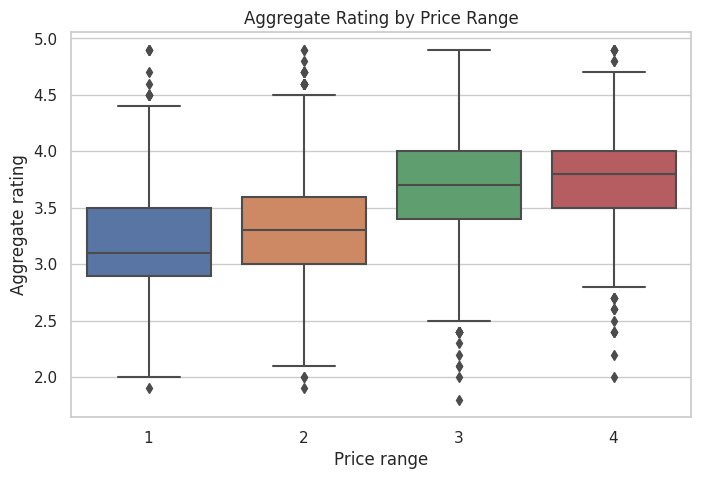

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Rating vs price range
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_india, x='Price range', y='Aggregate rating')
plt.title('Aggregate Rating by Price Range')
plt.show()


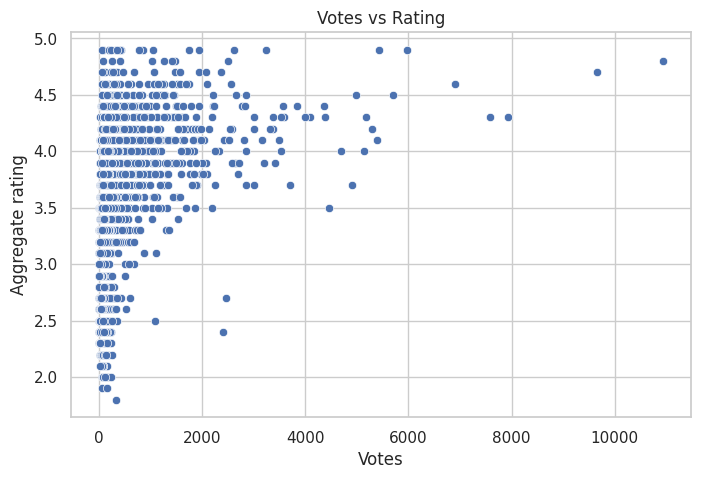

In [17]:
# Scatter plot to see correlation
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_india, x='Votes', y='Aggregate rating')
plt.title('Votes vs Rating')
plt.show()


In [18]:
# Check if table booking affects rating
df_booking = df_india.copy()
df_booking['Has Table booking'] = df_booking['Has Table booking'].map({'Yes': 1, 'No': 0})
table_booking_rating = df_booking.groupby('Has Table booking')['Aggregate rating'].mean()
print("Avg rating based on Table Booking:\n", table_booking_rating)


Avg rating based on Table Booking:
 Has Table booking
0    3.313342
1    3.550188
Name: Aggregate rating, dtype: float64


In [19]:
# Delivery status impact
deliver_now_rating = df_india.groupby('Is delivering now')['Aggregate rating'].mean()
print("Avg rating based on 'Is Delivering Now':\n", deliver_now_rating)


Avg rating based on 'Is Delivering Now':
 Is delivering now
0    3.352562
1    3.248485
Name: Aggregate rating, dtype: float64


In [20]:
# Split cuisines and explode
df_cuisine = df_india.copy()
df_cuisine['Cuisines'] = df_cuisine['Cuisines'].str.split(', ')
df_cuisine = df_cuisine.explode('Cuisines')

# Group by cuisine
top_cuisines = df_cuisine.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).head(10)
print("Top cuisines by avg rating:\n", top_cuisines)


Top cuisines by avg rating:
 Cuisines
Persian           4.600000
German            4.350000
Modern Indian     4.281250
Charcoal Grill    4.175000
Parsi             4.100000
Iranian           4.066667
Burmese           4.050000
Steak             4.050000
Spanish           4.028571
Indonesian        4.000000
Name: Aggregate rating, dtype: float64


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif


In [22]:

df = df_india[['City', 'Cuisines', 'Price range', 'Votes', 'Has Online delivery', 
         'Is delivering now','Aggregate rating']]

# Remove missing rows
df.dropna(inplace=True)

# Create binary target
df['high_rating'] = df['Aggregate rating'].apply(lambda x: 1 if x >= 3.5 else 0)

# Drop original rating
df.drop('Aggregate rating', axis=1, inplace=True)


/tmp/ipykernel_36/767090105.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
/tmp/ipykernel_36/767090105.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['high_rating'] = df['Aggregate rating'].apply(lambda x: 1 if x >= 3.5 else 0)
/tmp/ipykernel_36/767090105.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Aggregate rating', axis=1, 

In [23]:
df['Primary Cuisine'] = df['Cuisines'].apply(lambda x: str(x).split(',')[0].strip())
df['vote_range'] = pd.qcut(df['Votes'], q=4, labels=[1, 2, 3, 4])


/tmp/ipykernel_36/683388657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Primary Cuisine'] = df['Cuisines'].apply(lambda x: str(x).split(',')[0].strip())
/tmp/ipykernel_36/683388657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vote_range'] = pd.qcut(df['Votes'], q=4, labels=[1, 2, 3, 4])


In [24]:
df.drop('Cuisines', axis=1, inplace=True)



/tmp/ipykernel_36/1753719201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Cuisines', axis=1, inplace=True)


In [25]:
le_city = LabelEncoder()
le_cuisine = LabelEncoder()



df['City'] = le_city.fit_transform(df['City'])
df['Primary Cuisine'] = le_cuisine.fit_transform(df['Primary Cuisine'])



/tmp/ipykernel_36/3603195717.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['City'] = le_city.fit_transform(df['City'])
/tmp/ipykernel_36/3603195717.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Primary Cuisine'] = le_cuisine.fit_transform(df['Primary Cuisine'])


In [26]:
X = df.drop('high_rating', axis=1)
y = df['high_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [28]:
# Select top 5 features using ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=7)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# See which features are selected
selected_features = X.columns[selector.get_support()]
print("Selected Features:", list(selected_features))


Selected Features: ['City', 'Price range', 'Votes', 'Has Online delivery', 'Is delivering now', 'Primary Cuisine', 'vote_range']


In [29]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_selected, y_train)


RandomForestClassifier(random_state=42)

In [30]:
y_pred = clf.predict(X_test_selected)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Feature importances
importances = clf.feature_importances_
for name, score in zip(selected_features, importances):
    print(f"{name}: {score:.4f}")


[[612 127]
 [147 417]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       739
           1       0.77      0.74      0.75       564

    accuracy                           0.79      1303
   macro avg       0.79      0.78      0.78      1303
weighted avg       0.79      0.79      0.79      1303

City: 0.0827
Price range: 0.0646
Votes: 0.4667
Has Online delivery: 0.0196
Is delivering now: 0.0022
Primary Cuisine: 0.1600
vote_range: 0.2041


In [31]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_selected, y_train)
y_pred_lr = lr.predict(X_test_selected)
print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))


Logistic Regression:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       739
           1       0.78      0.71      0.74       564

    accuracy                           0.79      1303
   macro avg       0.79      0.78      0.78      1303
weighted avg       0.79      0.79      0.79      1303



In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_selected, y_train)
y_pred_knn = knn.predict(X_test_selected)
print("KNN:\n", classification_report(y_test, y_pred_knn))


KNN:
               precision    recall  f1-score   support

           0       0.80      0.85      0.82       739
           1       0.78      0.73      0.76       564

    accuracy                           0.80      1303
   macro avg       0.79      0.79      0.79      1303
weighted avg       0.80      0.80      0.79      1303



In [33]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train_selected, y_train)
y_pred_svc = svc.predict(X_test_selected)
print("SVM:\n", classification_report(y_test, y_pred_svc))


SVM:
               precision    recall  f1-score   support

           0       0.81      0.84      0.83       739
           1       0.78      0.75      0.76       564

    accuracy                           0.80      1303
   macro avg       0.80      0.79      0.79      1303
weighted avg       0.80      0.80      0.80      1303

